In [42]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import seaborn as sns

In [64]:
path_file = "data_sempli_holberton.xlsx"
sheet = "Matriz por cliente"
colsId = "A:J,O:T,W:AB"
df = pd.read_excel(path_file, 
                   sheet_name = sheet, 
                   header = 2,
                   usecols = colsId).sort_values(by='ID Cliente', ascending=True)
df.head(10)

,ID Cliente,Monto Acumulado,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,Procesos judiciales,Alertas,...,Instagram empresa,LinkedIn empresa,LinkedIn empresarios,Edad empresarios,Número de accionistas,Impacto,Acceso previso a la banca,# Empleados,Mujeres empresarias,Mujeres en cargos directivos
269,98.0,30000000,KT - EX,13 a 24 meses,Servicios,Venture,Bogotá D.C.,5,No procesos judiciales,No Alertas,...,No Ig,No LinkedIn,No LinkedIn empresarios,30,1,Si Impacto,Si acceso a la banca,110,No mujeres empresarias,3
529,241.0,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No procesos judiciales,No Alertas,...,Si Ig,Si LinkedIn,Si LinkedIn empresarios,45,2,No Impacto,Si acceso a la banca,16,No mujeres empresarias,2
344,362.0,50000000,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,No procesos judiciales,No Alertas,...,No Ig,Si LinkedIn,No LinkedIn empresarios,32,3,No Impacto,Si acceso a la banca,3,No mujeres empresarias,0
422,386.0,120000000,CR,25 a 36 meses,Industria,Scale Up,Itagüí,4,No procesos judiciales,No Alertas,...,Si Ig,No LinkedIn,No LinkedIn empresarios,23,1,Si Impacto,Si acceso a la banca,17,No mujeres empresarias,3
403,428.0,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No procesos judiciales,No Alertas,...,No Ig,Si LinkedIn,Si LinkedIn empresarios,44,2,No Impacto,Si acceso a la banca,5,No mujeres empresarias,0
116,429.0,111491000,SP,Menos de 12 meses,Servicios,Seed,Medellín,4,No procesos judiciales,No Alertas,...,No Ig,No LinkedIn,No LinkedIn empresarios,49,2,No Impacto,No acceso a la banca,5,No mujeres empresarias,2
449,430.0,1299370581,KT - CO,Menos de 12 meses,Industria,Venture,Envigado,5,No procesos judiciales,Sí Alertas,...,Si Ig,Si LinkedIn,Si LinkedIn empresarios,24,3,No Impacto,Si acceso a la banca,22,No mujeres empresarias,0
143,431.0,110000000,KT - EX,Más de 37 meses,Servicios,Seed,Medellín,6,No procesos judiciales,No Alertas,...,No Ig,No LinkedIn,No LinkedIn empresarios,41,2,No Impacto,Si acceso a la banca,20,No mujeres empresarias,3
289,432.0,675000000,CR,25 a 36 meses,Industria,Venture,Bogotá D.C.,5,No procesos judiciales,No Alertas,...,Si Ig,No LinkedIn,No LinkedIn empresarios,37,2,No Impacto,Si acceso a la banca,146,Si mujeres empresarias,0
117,459.0,150000000,CR,13 a 24 meses,Servicios,Scale Up,Medellín,4,No procesos judiciales,No Alertas,...,Si Ig,Si LinkedIn,Si LinkedIn empresarios,40,5,No Impacto,Si acceso a la banca,42,No mujeres empresarias,0


### no es utilizada
path_file = "data_sempli_holberton.xlsx"
sheet_2 = "Resumen Cuotas Créditos"
colsId2 = "A:H,J,K"

df2 = pd.read_excel(path_file, 
                   sheet_name = sheet_2, 
                   header = 0,
                   usecols = colsId2,
                   index_col = 'client_id').sort_values(by='client_id', ascending=True).replace('NaT', np.nan)

df2 = df2[df2.state != "GRACE"]
df2.head(10)

### normalizing expected_detail and paid_detail

In [68]:
# Loading data.
path_file = "data_sempli_holberton.xlsx"
df2 = pd.read_excel(path_file, sheet_name = 1, header = 0, index_col = 'client_id').sort_values(by='client_id', ascending=True).replace('NaT', np.nan)
data = pd.read_excel(path_file, sheet_name = 1, header = 0, usecols = "A:H").sort_values(by='client_id', ascending=True).replace('NaT', np.nan)


# Json normalize function.

def normalize_data(df, col_name):
    data = df[col_name].apply(json.loads)
    return pd.json_normalize(data)
# DataFrame's colums convertion (expected_detail, paid_detail).

expected = normalize_data(df2,'expected_detail')
paid = normalize_data(df2,'paid_detail')
data = data.join(expected).join(paid, rsuffix='_paid')
data = data[data.state != "GRACE"]
data = data[data.state != "PENDING"]
data.head(10)

,client_id,loan_schedule_id,loan_id,index,expected_date,state,arrears_days,paid_date,total,penalty,...,taxRetentionPercentage_paid,legalCharge_paid,preLegalCharge_paid,feesPaid_paid,fngTotal_paid,fngValue_paid,fngPercent_paid,fngVatValue_paid,fngVatPercent_paid,monthlyDeferredInterest_paid
233,14,85,14,11,2018-03-27,PAID,0,2018-02-09,998326.14,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,14,81,14,7,2017-11-27,PAID,0,2017-11-27,725458.10,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5559,14,78,14,4,2017-08-28,PAID,0,2017-08-28,10089498.77,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,14,82,14,8,2017-12-27,PAID,0,2017-12-27,1434084.75,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,14,83,14,9,2018-01-29,PAID,0,2018-01-29,725458.10,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,14,84,14,10,2018-02-27,PAID,0,2018-02-08,0.00,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12404,14,76,14,2,2017-06-27,PAID,0,2017-06-27,2017899.75,0,...,0.04,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7924,14,79,14,5,2017-09-27,PAID,0,2017-09-27,6204697.89,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5677,14,80,14,6,2017-10-27,PAID,4,2017-10-31,2579247.43,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5464,14,75,14,1,2017-05-30,PAID,0,2017-05-30,3732259.82,0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


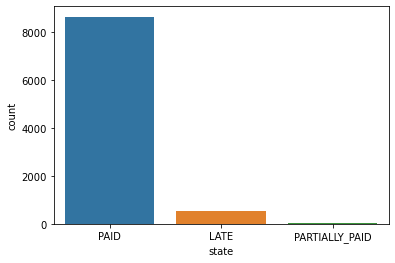

In [69]:
sns.countplot(x='state', data= data)

In [70]:
data['state'].value_counts()

PAID              8625
LATE               535
PARTIALLY_PAID      37
Name: state, dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9197 entries, 233 to 8402
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   client_id                     9197 non-null   int64         
 1   loan_schedule_id              9197 non-null   int64         
 2   loan_id                       9197 non-null   int64         
 3   index                         9197 non-null   int64         
 4   expected_date                 9197 non-null   datetime64[ns]
 5   state                         9197 non-null   object        
 6   arrears_days                  9197 non-null   int64         
 7   paid_date                     8632 non-null   datetime64[ns]
 8   total                         9197 non-null   float64       
 9   penalty                       9197 non-null   int64         
 10  interest                      9197 non-null   float64       
 11  insurance                   

In [73]:
data.merge(df, left_on='client_id', right_on='ID Cliente').to_excel('output.xlsx')